In [44]:
import os
print(os.getcwd())

/root/autodl-tmp


In [45]:
os.chdir("/root/autodl-tmp/")

In [52]:
#Scientific computing 
import numpy as np

#Pytorch packages
import torch
from torch import nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import TensorDataset

#Visulization
import matplotlib.pyplot as plt

#Others
import time
import copy
import gzip

In [53]:
#transform = transforms.Compose([transforms.ToTensor(),
#                              transforms.Normalize((0.5,), (0.5,)),
#                              ])
#
#train_set = datasets.MNIST('data/', download=False, train=True, transform=transform)
#test_set = datasets.MNIST('data/', download=False, train=False, transform=transform)

In [54]:
def load_mnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        f.read(16)
        images = np.frombuffer(f.read(), dtype=np.uint8)
        images = images.reshape(-1, 28, 28)
    return images

In [55]:
def load_mnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        f.read(8)
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

In [56]:
x_train = load_mnist_images("./data/MNIST/raw/train-images-idx3-ubyte.gz")
y_train = load_mnist_labels("./data/MNIST/raw/train-labels-idx1-ubyte.gz")
x_test = load_mnist_images("./data/MNIST/raw/t10k-images-idx3-ubyte.gz")
y_test = load_mnist_labels("./data/MNIST/raw/t10k-labels-idx1-ubyte.gz")

In [57]:
y_train_oh = np.eye(10)[y_train]
y_test_oh = np.eye(10)[y_test]

In [58]:
y_train_oh = torch.tensor(y_train_oh, dtype=torch.float32)
y_test_oh = torch.tensor(y_test_oh, dtype=torch.float32)

In [59]:
x_train = torch.tensor(np.expand_dims(x_train, 1), dtype=torch.float32)
x_test = torch.tensor(np.expand_dims(x_test, 1), dtype=torch.float32)

In [60]:
train_dataset = TensorDataset(x_train, y_train_oh)
test_dataset = TensorDataset(x_test, y_test_oh)

In [61]:
torch.save({
    'train_dataset': train_dataset,  
    'test_dataset': test_dataset
}, '/root/autodl-tmp/data/saved_datasets.pth')

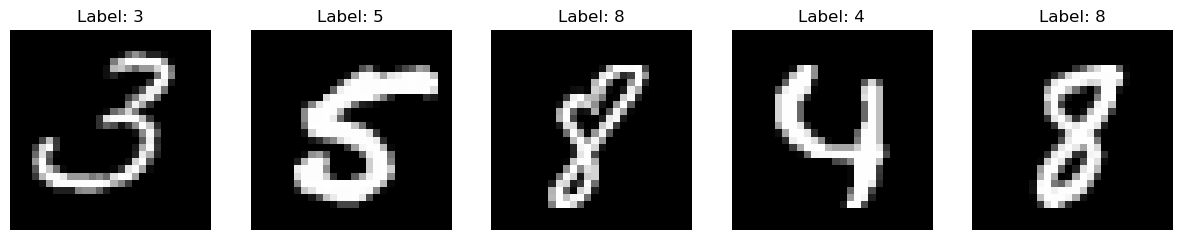

In [17]:
import matplotlib.pyplot as plt

# 随机选择一些样本进行可视化
dataiter = iter(train_loader)
images, labels = next(dataiter)

# 显示图片
fig, axs = plt.subplots(1, 5, figsize=(15, 3))  # 创建一个包含 5 个子图的图形
for i in range(5):
    axs[i].imshow(images[i].squeeze(), cmap='gray')  # squeeze 去除多余的维度
    axs[i].set_title(f'Label: {labels[i]}')  # 显示标签
    axs[i].axis('off')  # 关闭坐标轴

plt.show()  # 显示所有图像
